# Explore here

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pickle import dump

In [14]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df_raw.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [16]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_',) 
        .str.replace(r'\W', '', regex=True)
        .str.lower()
        .str.slice(0, 40), axis=1 
    )
    .loc[:,['latitude','longitude','medinc']] 
    .drop_duplicates() 
)

In [17]:
df_interim.head()

,latitude,longitude,medinc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [18]:
df_interim.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,20635.0,35.632048,2.136036,32.5400,33.9300,34.2600,37.7100,41.9500
longitude,20635.0,-119.569854,2.003666,-124.3500,-121.8000,-118.4900,-118.0100,-114.3100
medinc,20635.0,3.869106,1.895274,0.4999,2.5631,3.5347,4.7426,15.0001


In [19]:
df = df_interim.copy()

In [20]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 2024)

X_train.head()

,latitude,longitude,medinc
14371,32.71,-117.24,6.6661
6467,34.10,-118.05,4.2321
7481,33.93,-118.23,1.4861
18922,38.07,-122.17,6.4599
12031,33.92,-117.46,3.5208


In [21]:

model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [22]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,latitude,longitude,medinc,cluster
14371,32.71,-117.24,6.6661,0
6467,34.10,-118.05,4.2321,0
7481,33.93,-118.23,1.4861,2
18922,38.07,-122.17,6.4599,1
12031,33.92,-117.46,3.5208,2


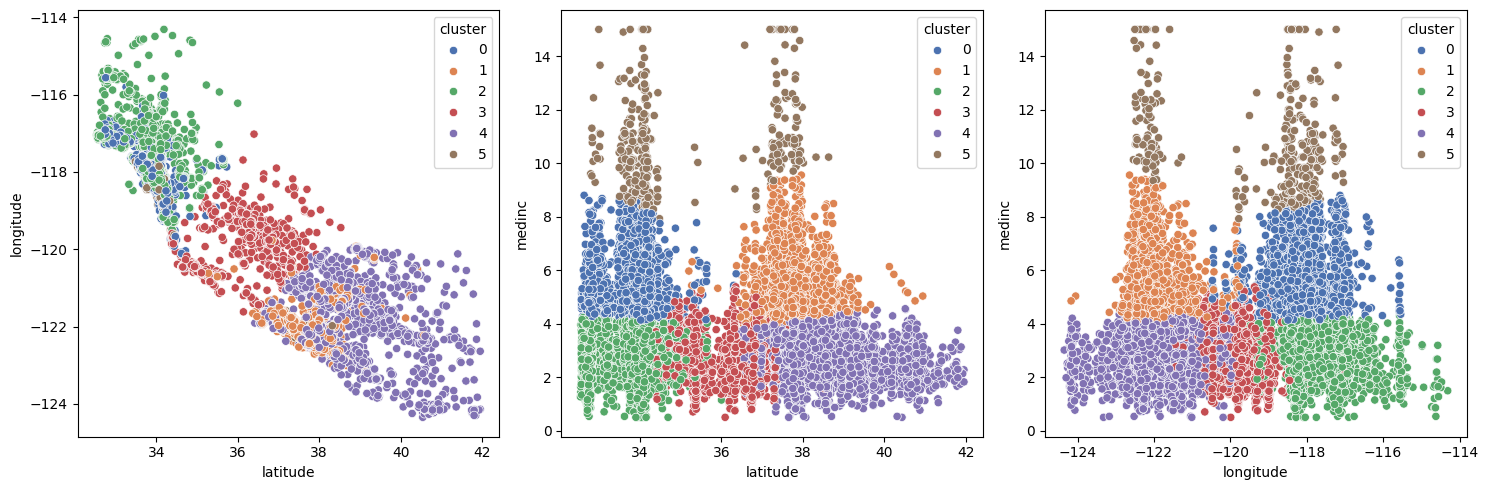

In [23]:
# Hacemos un scatterplot

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "latitude", y = "longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "latitude", y = "medinc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "longitude", y = "medinc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [24]:
# trabajando con los test

y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,latitude,longitude,medinc,cluster
18662,36.99,-121.93,4.7325,1
12292,33.93,-116.98,2.1581,2
2706,32.87,-115.60,4.1293,2
13883,34.45,-117.27,3.2215,2
10997,33.73,-117.83,3.5387,2


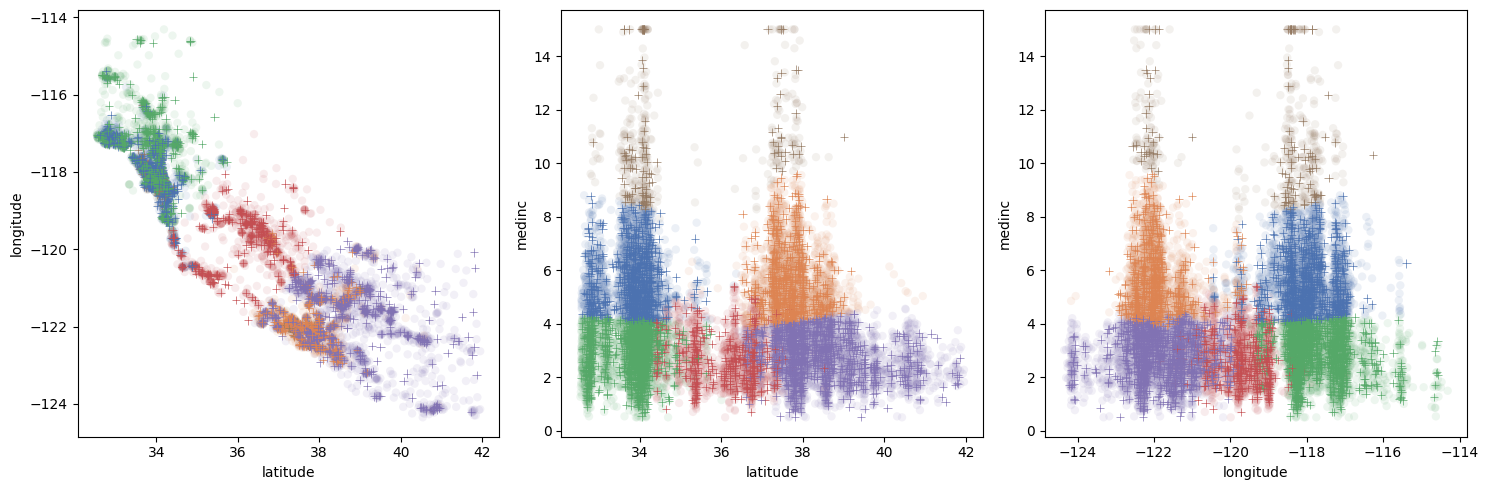

In [25]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "latitude", y = "longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "latitude", y = "medinc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "longitude", y = "medinc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "latitude", y = "longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "latitude", y = "medinc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "longitude", y = "medinc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [26]:
# Modelo supervisado 

model_tree = DecisionTreeClassifier(random_state = 42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

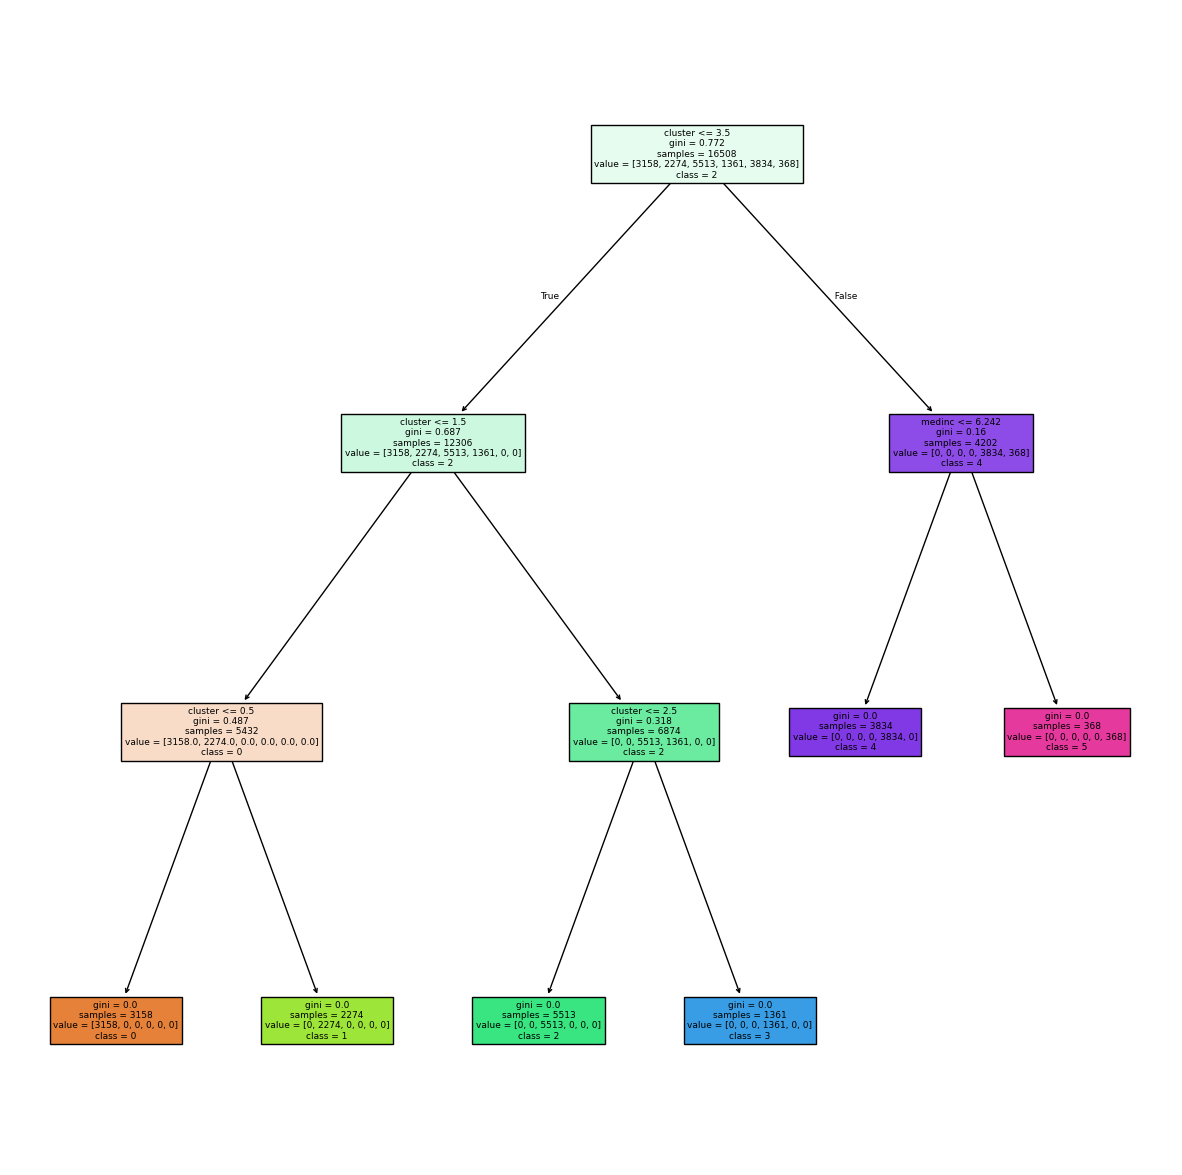

In [27]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [28]:
y_pred = model_tree.predict(X_test)
y_pred

array([1, 2, 2, ..., 3, 2, 4], shape=(4127,), dtype=int32)

In [29]:
# Guardamos los modelos 

dump(model, open("../models/k-means_2024.sav", "wb"))
dump(model_tree, open("../models/decision_tree_classifier_2024.sav", "wb"))